In [12]:
import muon as mu
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import distinctipy
from distinctipy import colorblind
from distinctipy import examples
import PyComplexHeatmap as pch
import pandas as pd
from pathlib import Path
import re
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import muon as mu

In [2]:
trajMap= mu.read_h5mu("../process_data/trajMap/1.12_trajmap_2nd.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [3]:
sc.settings.figdir="../result/24.3.12_TRAVSupp/"

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


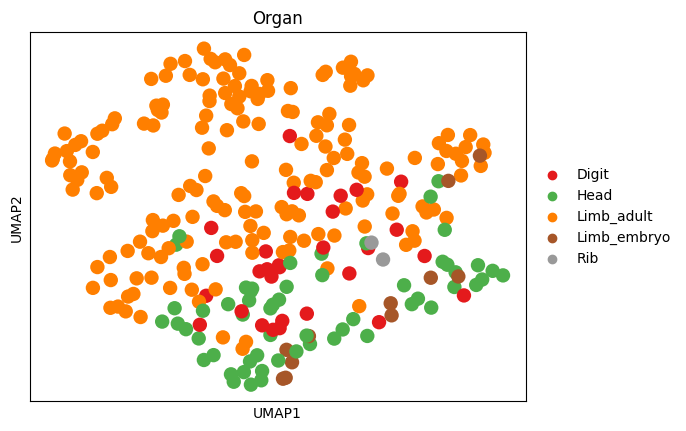

In [4]:
sc.pl.umap(trajMap,color=["Organ"],save="Organ",palette="Set1")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


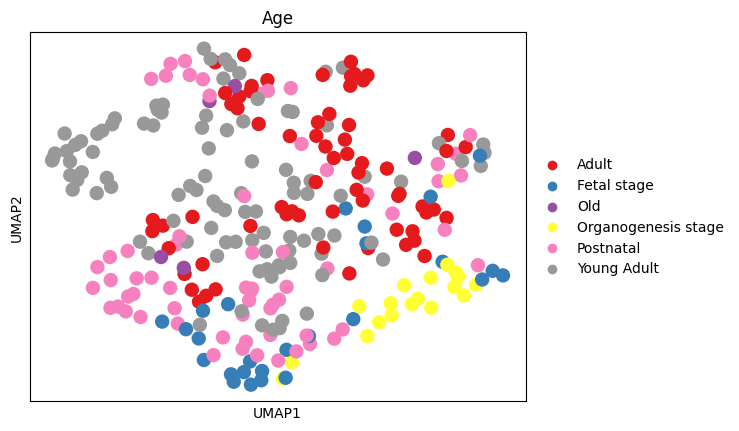

In [5]:
sc.pl.umap(trajMap,color=["Age"],save="Age",palette="Set1")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


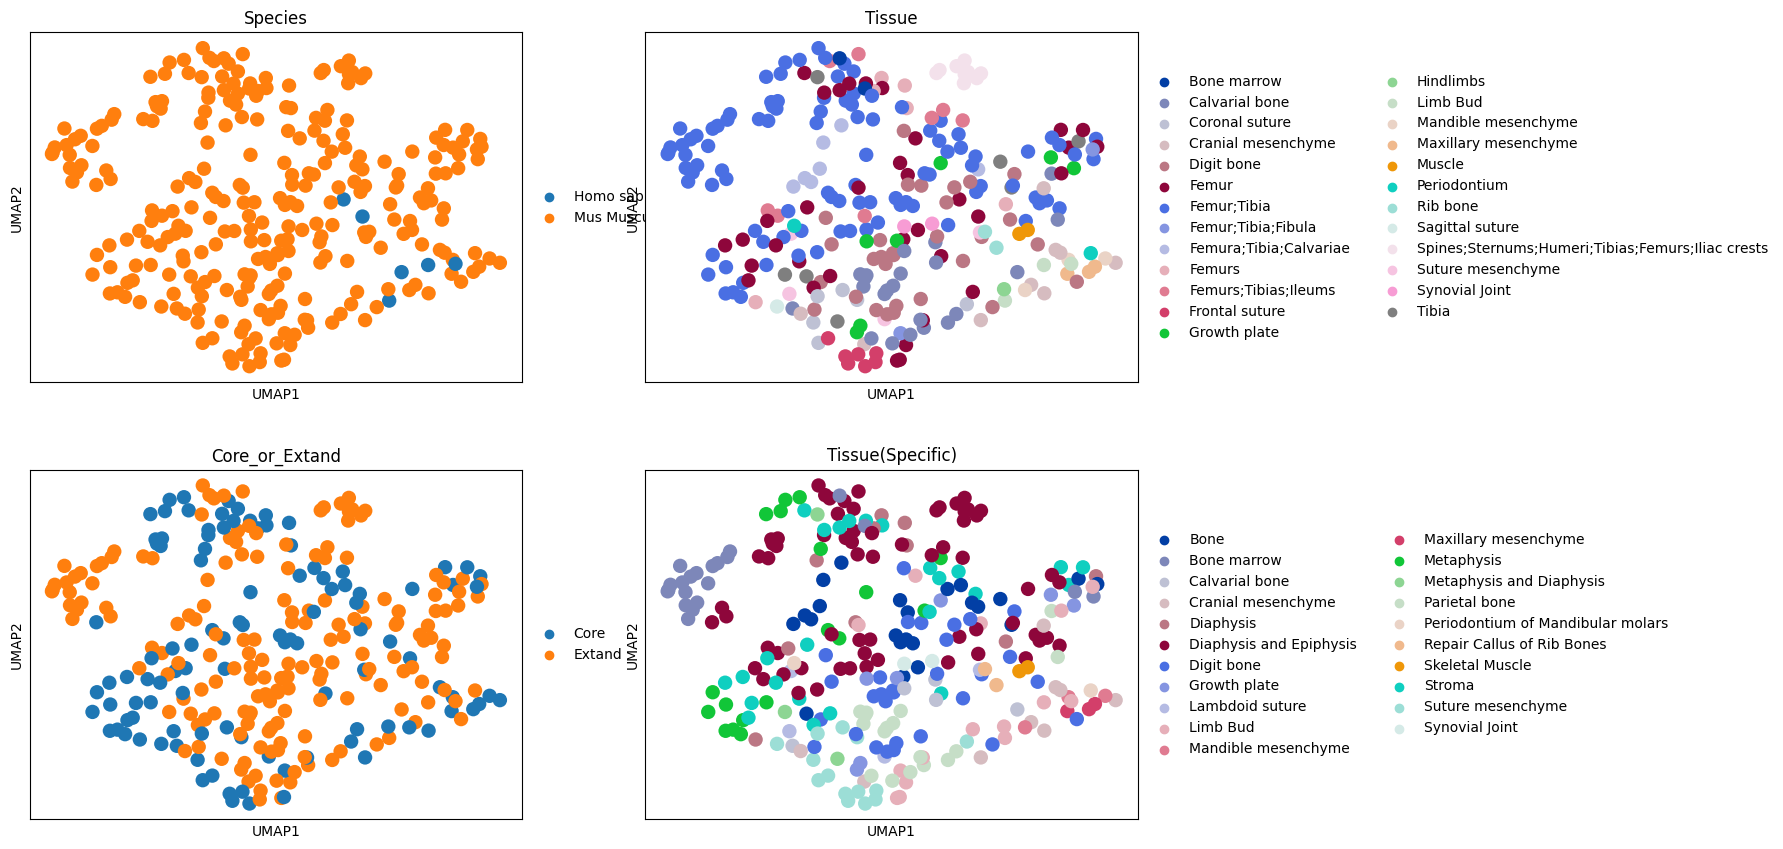

In [8]:
sc.pl.umap(trajMap,color=['Species',"Tissue","Core_or_Extand","Tissue(Specific)"],ncols=2,save="covariate")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


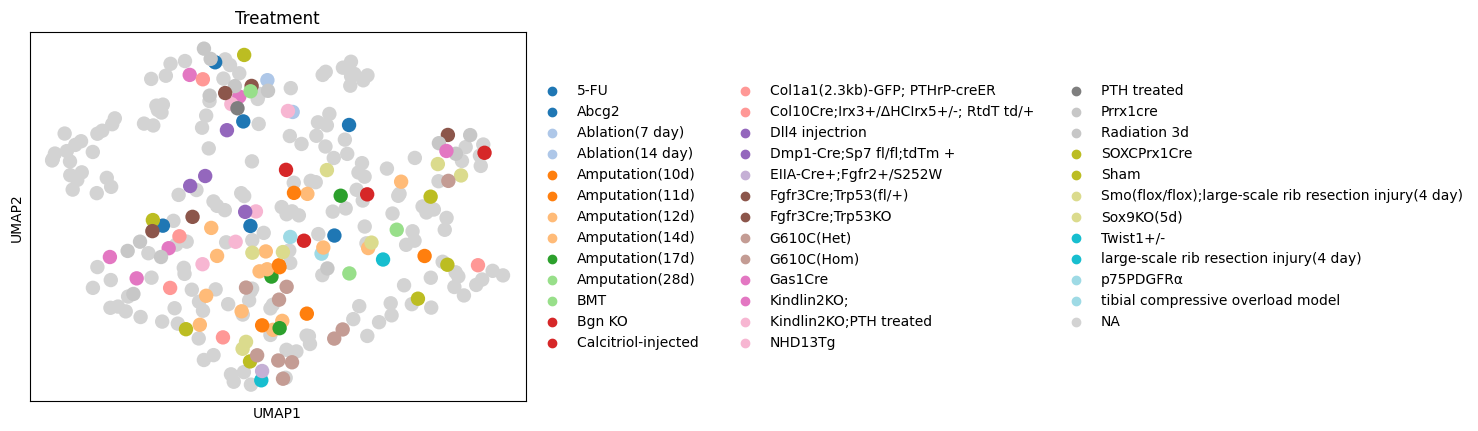

In [11]:
sc.pl.umap(trajMap,color=['Treatment'],save="Treatment",palette="tab20")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


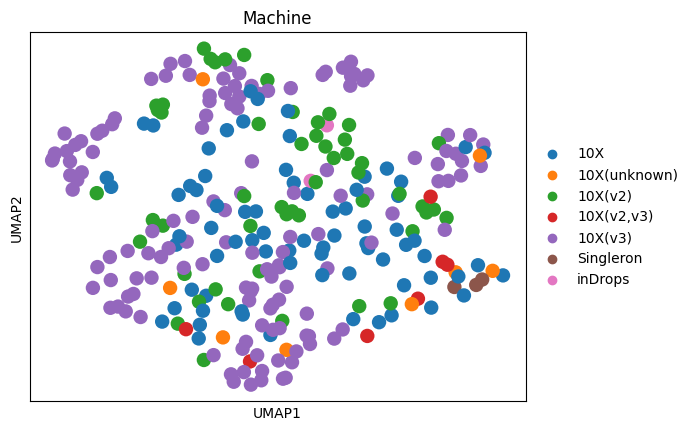

In [9]:
sc.pl.umap(trajMap,color=['Machine'],ncols=2,save="Machine")

In [15]:
trav=trajMap['TRAV']

In [20]:
trav.obsm['X_umap']=trajMap.obsm["X_umap"]

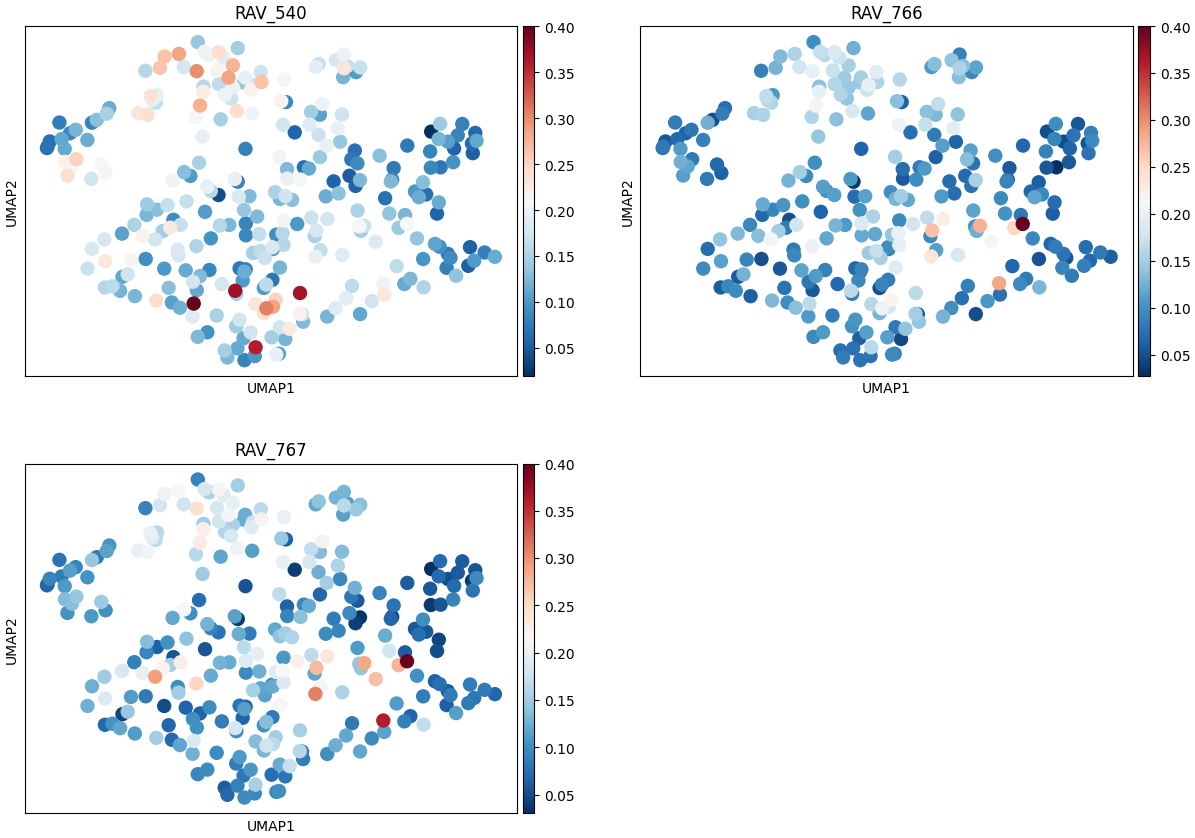

In [23]:
sc.pl.umap(trav,color=["RAV_540","RAV_766","RAV_767"],ncols=2,cmap="RdBu_r",layer="raw",vmax=0.4,save="injuryTRAV")

In [29]:
coorDf=pd.DataFrame(trajMap["coor"].layers["raw"])
exprDf=pd.DataFrame(trajMap["expr"].layers["raw"])
peakDf=pd.DataFrame(trajMap["peak"].layers["raw"])
coorDf.columns=trajMap["coor"].var_names
coorDf.index=trajMap["coor"].obs_names
exprDf.columns=trajMap["coor"].var_names
exprDf.index=trajMap["coor"].obs_names
peakDf.columns=trajMap["coor"].var_names
peakDf.index=trajMap["coor"].obs_names
coorDf=coorDf.T
exprDf=exprDf.T
peakDf=peakDf.T
coorDf_sqrt = np.where(coorDf >= 0, np.sqrt(coorDf), -np.sqrt(-coorDf))
coorDf_sqrt=pd.DataFrame(coorDf_sqrt)
coorDf_sqrt.columns=coorDf.columns
coorDf_sqrt.index=coorDf.index
exprDf = exprDf.apply(lambda row: (row) / (row.max()), axis=1)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [30]:
ravIndex=pd.read_csv("../process_data/trajMap/24.3.12_TRAVindex.csv",index_col=0)

In [57]:
RAV_766=ravIndex["RAV_540"].sort_values(ascending=False).index[0:20]

In [43]:
def makeLong(gene,sampleIndex):
    selectCoor=coorDf_sqrt.loc[gene]
    selectExpr=exprDf.loc[gene]
    selectPeak=peakDf.loc[gene]
    selectCoor=selectCoor.iloc[:,sampleIndex]
    selectExpr=selectExpr.iloc[:,sampleIndex]
    selectPeak=selectPeak.iloc[:,sampleIndex]
    coorLong=selectCoor.stack().reset_index(name="Coor")
    exprLong=selectExpr.stack().reset_index(name="Expr")
    peakLong=selectPeak.stack().reset_index(name="Peak")
    peakLong['Stage']=peakLong.Peak.apply(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Stage']
    return(combineDf)

In [44]:
combined_list1=np.where((trajMap.obs["Lineage"]=="Mesenchyme") & (trajMap.obs["MesInjury"]!="None" ))[0]
combined_list2=np.where((trajMap.obs["Lineage"]=="Mesenchyme") & (trajMap.obs["MesInjury"]=="None" ))[0]
import random
combined_list2=random.sample(set(combined_list2),20)

In [45]:
combined_list=combined_list1.tolist()+combined_list2

In [58]:
dotPlotDf=makeLong(RAV_766,combined_list)

In [48]:
meta=trajMap.obs.iloc[combined_list]
injuryAnno=meta[["MesInjury","Age","Organ"]]

In [50]:
col_ha = pch.HeatmapAnnotation(Injury=pch.anno_simple(injuryAnno['MesInjury'],cmap='Set1',legend=False,add_text=True),
                               Age=pch.anno_simple(injuryAnno['Age'],cmap='Set2',legend=True,add_text=False),
                               Tissue=pch.anno_simple(injuryAnno['Organ'],cmap='Set3',legend=True,add_text=False),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 46.56805555555555 mm
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


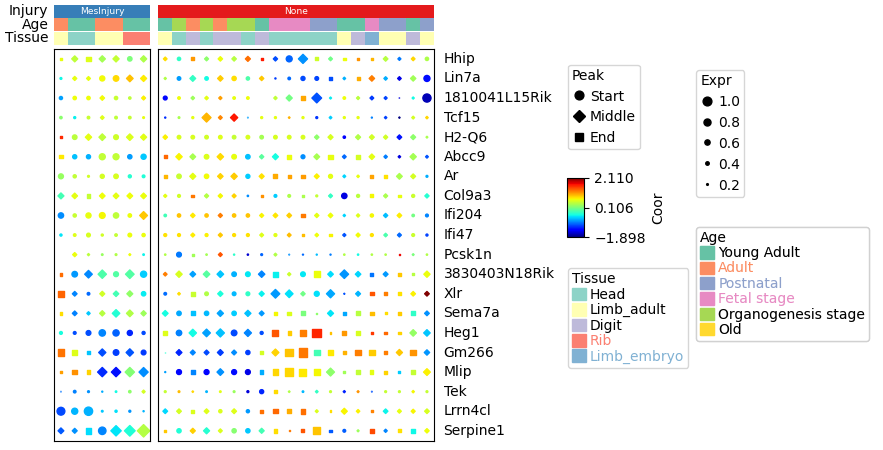

In [61]:
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(dotPlotDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=injuryAnno['MesInjury'],ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.3.12_TRAVSupp//3.12_diffGene_dotplot_RAV540.pdf")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 46.56805555555555 mm
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


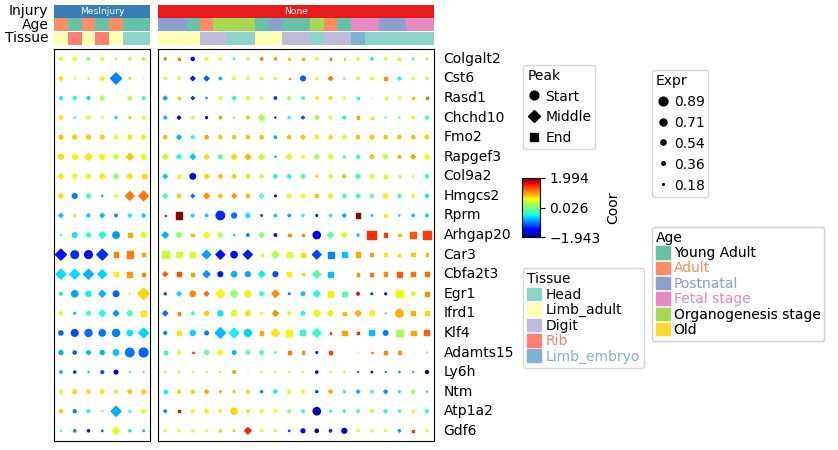

In [62]:
RAV_766=ravIndex["RAV_767"].sort_values(ascending=False).index[0:20]
dotPlotDf=makeLong(RAV_766,combined_list)
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(dotPlotDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=injuryAnno['MesInjury'],ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.3.12_TRAVSupp//3.12_diffGene_dotplot_RAV767.pdf")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 46.56805555555555 mm
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


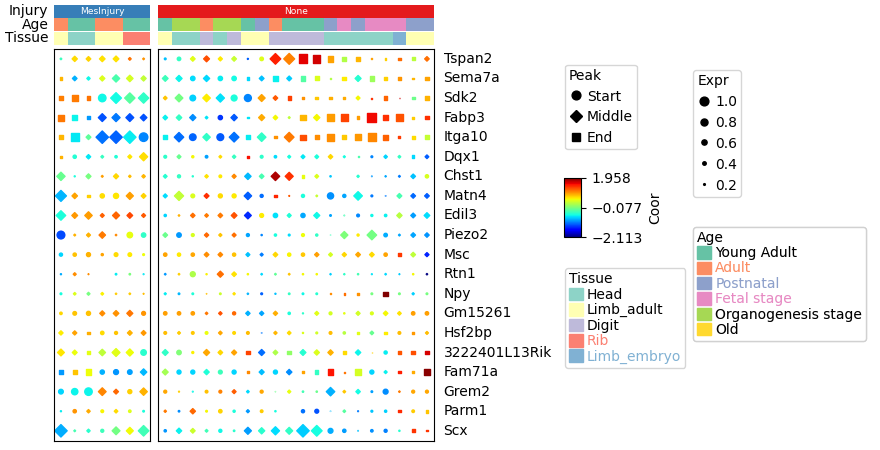

In [63]:
RAV_766=ravIndex["RAV_766"].sort_values(ascending=False).index[0:20]
dotPlotDf=makeLong(RAV_766,combined_list)
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(dotPlotDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=injuryAnno['MesInjury'],ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.3.12_TRAVSupp//3.12_diffGene_dotplot_RAV766.pdf")

In [67]:
trav.var_names

Index(['RAV_1', 'RAV_2', 'RAV_3', 'RAV_4', 'RAV_5', 'RAV_6', 'RAV_7', 'RAV_8',
       'RAV_9', 'RAV_10',
       ...
       'RAV_762', 'RAV_763', 'RAV_764', 'RAV_765', 'RAV_766', 'RAV_767',
       'RAV_768', 'RAV_769', 'RAV_770', 'RAV_771'],
      dtype='object', length=771)